# Combined Charts of our Models

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [10]:
# load in our files
with open("./results/TargetValues.pkl", "rb") as f:
    target = pickle.load(f)
    
with open("./results/STGCNPredictions.pkl", "rb") as f:
    stgcn_preds = pickle.load(f)

with open("./results/STGCN_metadataPredictions.pkl", "rb") as f:
    stgcn_metadata_preds = pickle.load(f)

target.shape, stgcn_preds.shape, stgcn_metadata_preds.shape

((90, 1487, 23), (90, 1487, 23), (90, 1487, 23))

Begin Plotting

In [14]:
def plotPredictions(target, stgcn_preds, stgcn_metadata_preds, node, timestep):
    t = target[timestep][node]
    stgcn = stgcn_preds[timestep][node]
    stgcn_meta = stgcn_metadata_preds[timestep][node]
    
    
    plt.figure(figsize=(14,6))
    plt.title('STGNN Model Predictions Vs. Gold Standard')
    plt.plot(t, label = "Gold Standard Load", color = "gold")
    plt.plot(stgcn, label = "STGCN", color = "blue")
    plt.plot(stgcn_meta, label = "STGCN + Metadata", color = "green")
    plt.xlabel("Timestep (hourly)")
    plt.ylabel("Load Demand")
    plt.legend()
    plt.show()

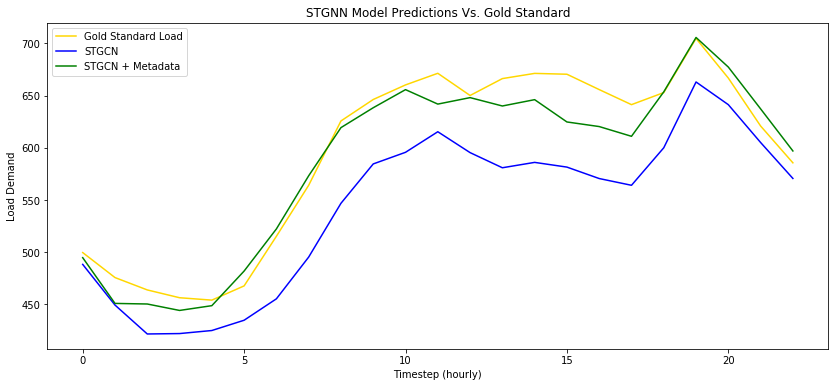

In [15]:
plotPredictions(target, stgcn_preds, stgcn_metadata_preds, 1, 15)

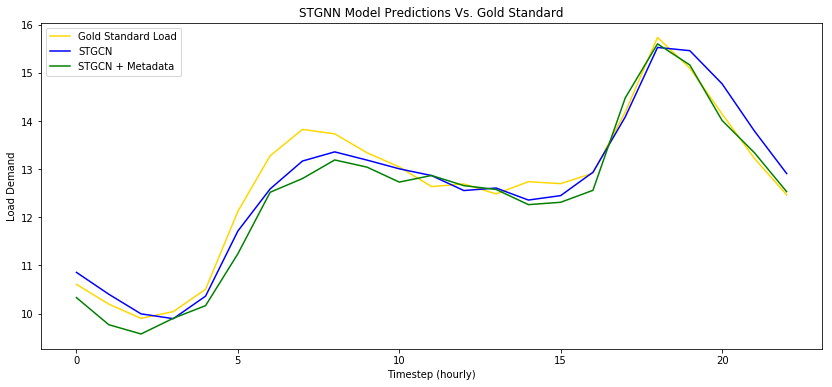

In [18]:
plotPredictions(target, stgcn_preds, stgcn_metadata_preds, 1300, 20)